<a href="https://colab.research.google.com/github/garfield-gray/DIP/blob/main/dipHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#4/14/2023, Let's begin
import numpy as np
import matplotlib.pyplot as plt

#First Problem

$$Assignment\; report$$

this Assignment was meant to deploy about and it's application in denoising pictures.

  in the first section, pictures would be transformed into signal domain using fft and using two filters to denoise:

1- The Ideal pass filter(with square of 1 in the middle and 0 everywhere else) which should be determined manually as requested in the assignment.

2- The gaussian filter which is more robust and doesn't need to be determined manually as requested in the assignment.

In [ ]:
# first off we upload the images


im = plt.imread("1.png", ".png")

# only one channel of the matrix would do the job
im1 = plt.imread("2.png", ".png")[:,:,0]
im2 = plt.imread("donald.png", ".png")[:,:,0]

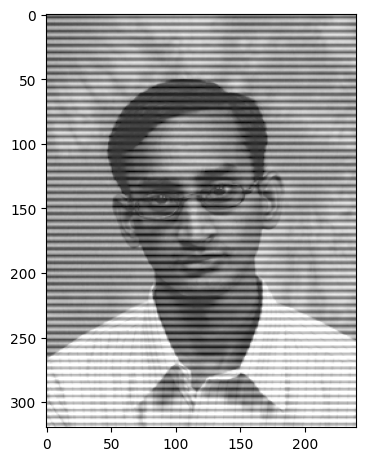

In [ ]:
# Displaying
plt.figure(figsize = (4,7))
plt.imshow(im, cmap="gray")
plt.show()

In [ ]:
# figuring out the size of Matrix
im.shape

(320, 240)

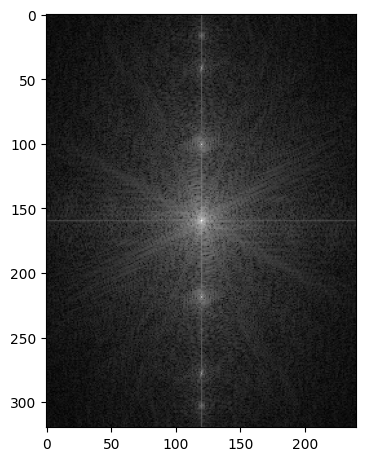

In [ ]:
# transformaton to signal domain through fft
imf = np.fft.fftshift(np.fft.fft2(im))
plt.figure(figsize = (4,7))
plt.imshow(np.log(np.ones(imf.shape)+abs(imf)), cmap="gray")
plt.show()

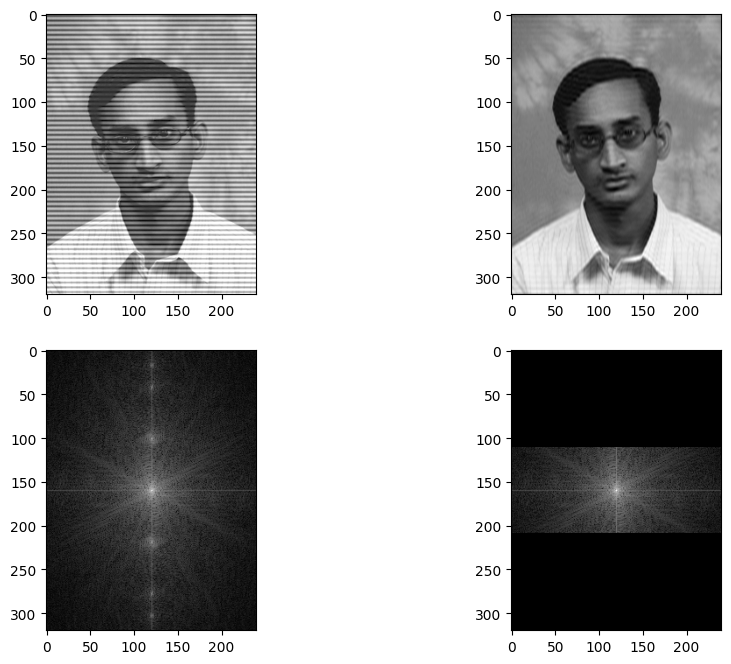

In [ ]:
#Ideal pass filter for first picture

# Load the image
gray = im

# Apply the FFT
f = np.fft.fft2(gray)

# Shift the FFT
fshift = np.fft.fftshift(f)

# Create a low-pass filter
rows, cols = gray.shape
crow, ccol = int(rows/2), int(cols/2)
lpf = np.zeros((rows, cols), np.uint8)
r = 49
lpf[crow-r:crow+r,:] = 1

# Apply the filter to the FFT
fshift_filtered = fshift * lpf

# Shift back the result
f_filtered = np.fft.ifftshift(fshift_filtered)

# Apply the inverse FFT
filtered = np.abs(np.fft.ifft2(f_filtered))

# Display the result

f, axarr = plt.subplots(2,2,figsize=(11,8))
axarr[0,0].imshow(im, cmap = 'gray')
axarr[0,1].imshow(filtered, cmap = 'gray')
axarr[1,0].imshow(np.log(np.ones(fshift.shape)+abs(fshift)), cmap = 'gray')
axarr[1,1].imshow(np.log(np.ones(fshift_filtered.shape)+abs(fshift_filtered)), cmap = 'gray')
plt.show()

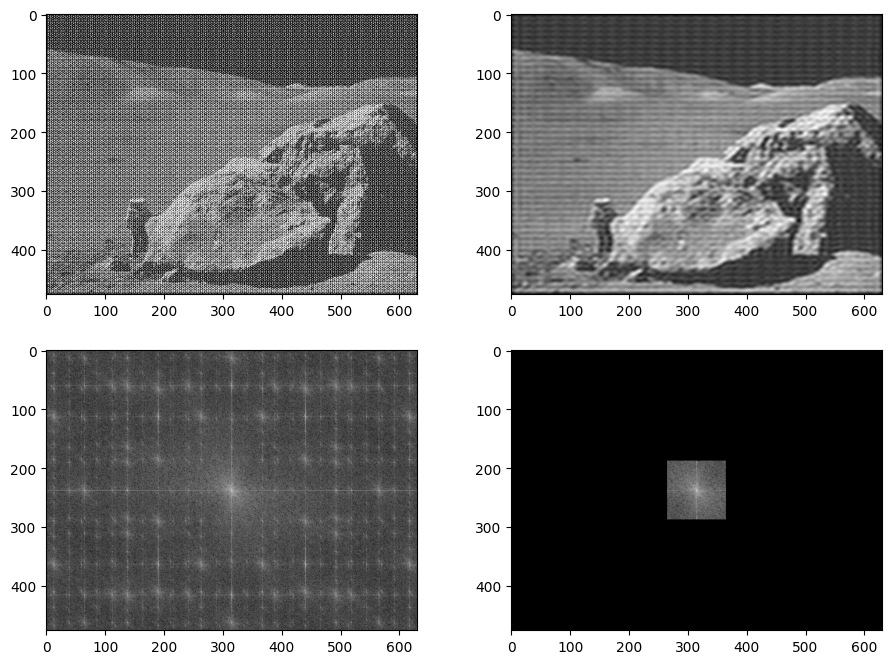

In [ ]:
# Ideal pass for other pictures

# Loading
gray = im1

# Apply the FFT
f = np.fft.fft2(gray)

# Shift the FFT
fshift = np.fft.fftshift(f)

# Create a low-pass filter
rows, cols = gray.shape
crow, ccol = int(rows/2), int(cols/2)
lpf = np.zeros((rows, cols), np.uint8)
r = 50
lpf[crow-r:crow+r, ccol-r:ccol+r] = 1

# Apply the filter to the FFT
fshift_filtered = fshift * lpf

# Shift back the result
f_filtered = np.fft.ifftshift(fshift_filtered)

# Apply the inverse FFT
filtered = np.abs(np.fft.ifft2(f_filtered))

# Display the result

f, axarr = plt.subplots(2,2,figsize=(11,8))
axarr[0,0].imshow(gray, cmap = 'gray')
axarr[0,1].imshow(filtered, cmap = 'gray')
axarr[1,0].imshow(np.log(np.ones(fshift.shape)+abs(fshift)), cmap = 'gray')
axarr[1,1].imshow(np.log(np.ones(fshift_filtered.shape)+abs(fshift_filtered)), cmap = 'gray')
plt.show()

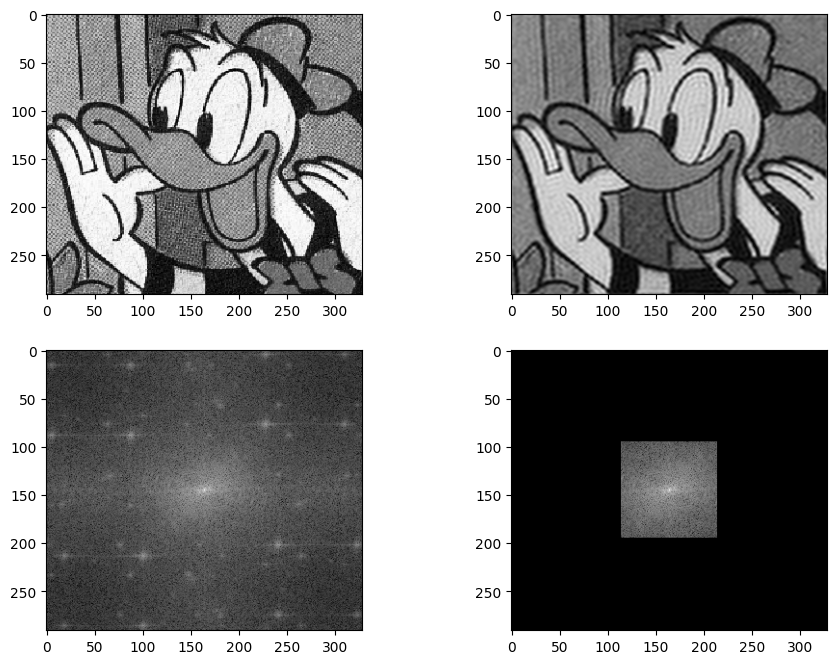

In [ ]:
# Ideal pass for other pictures

# Loading
gray = im2

# Apply the FFT
f = np.fft.fft2(gray)

# Shift the FFT
fshift = np.fft.fftshift(f)

# Create a low-pass filter
rows, cols = gray.shape
crow, ccol = int(rows/2), int(cols/2)
lpf = np.zeros((rows, cols), np.uint8)
r = 50
lpf[crow-r:crow+r, ccol-r:ccol+r] = 1

# Apply the filter to the FFT
fshift_filtered = fshift * lpf

# Shift back the result
f_filtered = np.fft.ifftshift(fshift_filtered)

# Apply the inverse FFT
filtered = np.abs(np.fft.ifft2(f_filtered))

# Display the result

f, axarr = plt.subplots(2,2,figsize=(11,8))
axarr[0,0].imshow(gray, cmap = 'gray')
axarr[0,1].imshow(filtered, cmap = 'gray')
axarr[1,0].imshow(np.log(np.ones(fshift.shape)+abs(fshift)), cmap = 'gray')
axarr[1,1].imshow(np.log(np.ones(fshift_filtered.shape)+abs(fshift_filtered)), cmap = 'gray')
plt.show()

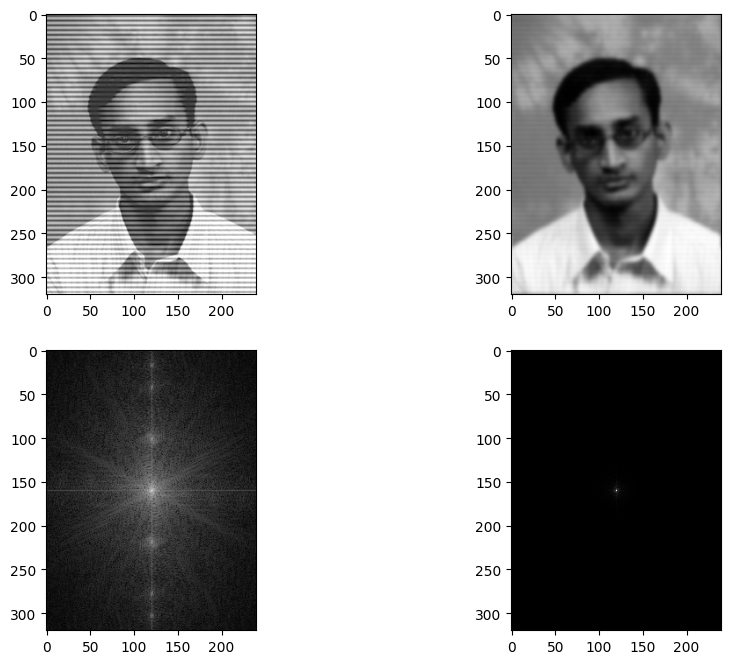

In [ ]:
# Gaussian filter

# Define the Gaussian filter
def gaussian_filter(shape=(3, 3), sigma=0.5):
    m, n = [(ss-1.)/2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x*x + y*y) / (2.*sigma*sigma))
    h /= h.sum()
    return h

# Loading
gray = im

# Apply the FFT
f = np.fft.fft2(gray)

# Shift the FFT
fshift = np.fft.fftshift(f)

# Create a Gaussian filter
rows, cols = gray.shape
lpf = gaussian_filter(shape=(rows, cols), sigma=22)

# Apply the filter to the FFT
fshift_filtered = fshift * lpf

# Shift back the result
f_filtered = np.fft.ifftshift(fshift_filtered)

# Apply the inverse FFT
filtered = np.abs(np.fft.ifft2(f_filtered))

# Plot the original and filtered images
f, axarr = plt.subplots(2,2,figsize=(11,8))
axarr[0,0].imshow(im, cmap = 'gray')
axarr[0,1].imshow(filtered, cmap = 'gray')
axarr[1,0].imshow(np.log(np.ones(fshift.shape)+abs(fshift)), cmap = 'gray')
axarr[1,1].imshow(np.log(np.ones(fshift_filtered.shape)+abs(fshift_filtered)), cmap = 'gray')
plt.show()

In [ ]:
im1.shape

(476, 630)

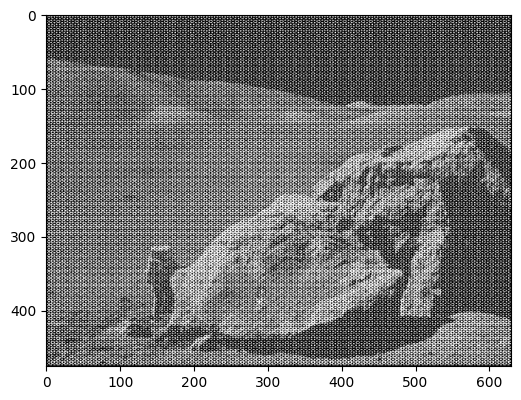

In [ ]:
plt.figure(figsize = (6,10))
plt.imshow(im1, cmap="gray")
plt.show()


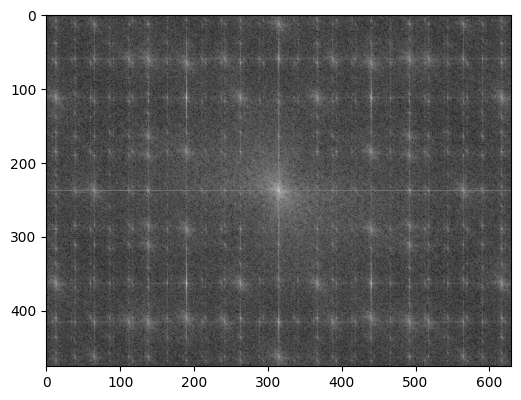

In [ ]:
# transformaton to signal domain through fft
imf1 = np.fft.fftshift(np.fft.fft2(im1))
plt.figure(figsize = (6,10))
plt.imshow(np.log(np.ones(imf1.shape)+abs(imf1)), cmap="gray")
plt.show()

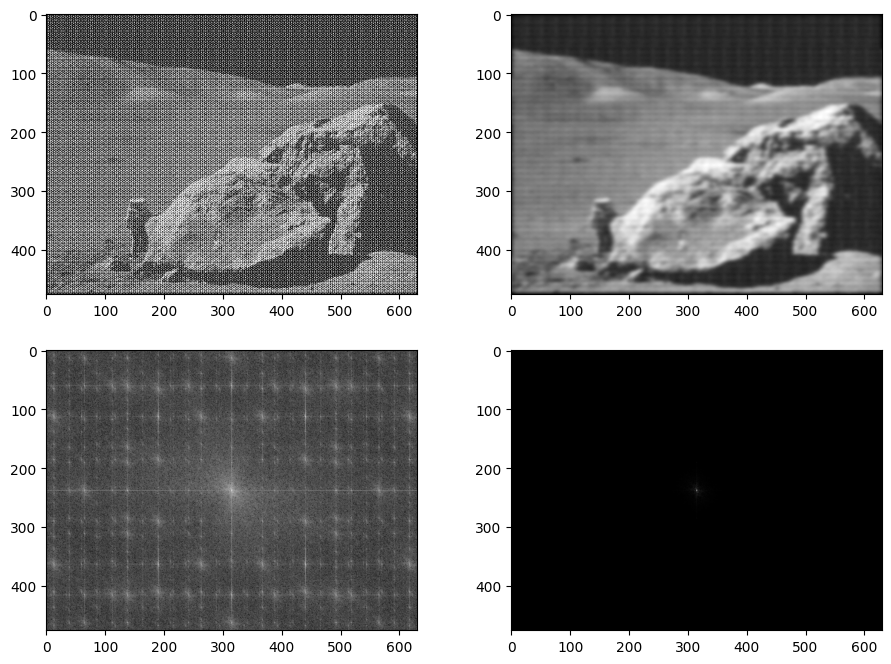

In [ ]:

# Define the Gaussian filter
def gaussian_filter(shape=(3, 3), sigma=0.5):
    m, n = [(ss-1.)/2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x*x + y*y) / (2.*sigma*sigma))
    h /= h.sum()
    return h

# Convert to grayscale
gray = im1

# Apply the FFT
f = np.fft.fft2(gray)

# Shift the FFT
fshift = np.fft.fftshift(f)

# Create a Gaussian filter
rows, cols = gray.shape
lpf = gaussian_filter(shape=(rows, cols), sigma=26)

# Apply the filter to the FFT
fshift_filtered = fshift * lpf

# Shift back the result
f_filtered = np.fft.ifftshift(fshift_filtered)

# Apply the inverse FFT
filtered = np.abs(np.fft.ifft2(f_filtered))

# Plot the original and filtered images
f, axarr = plt.subplots(2,2,figsize=(11,8))
axarr[0,0].imshow(im1, cmap = 'gray')
axarr[0,1].imshow(filtered, cmap = 'gray')
axarr[1,0].imshow(np.log(np.ones(fshift.shape)+abs(fshift)), cmap = 'gray')
axarr[1,1].imshow(np.log(np.ones(fshift_filtered.shape)+abs(fshift_filtered)), cmap = 'gray')
plt.show()

In [ ]:
im2.shape

(291, 328)

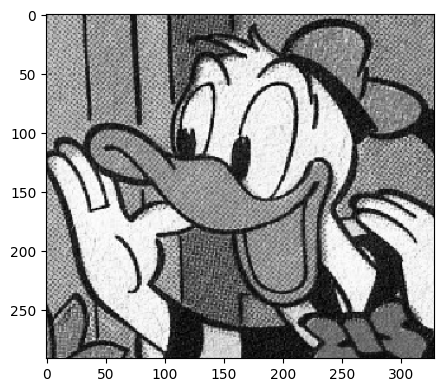

In [ ]:
plt.figure(figsize = (5,8))
plt.imshow(im2, cmap="gray")
plt.show()


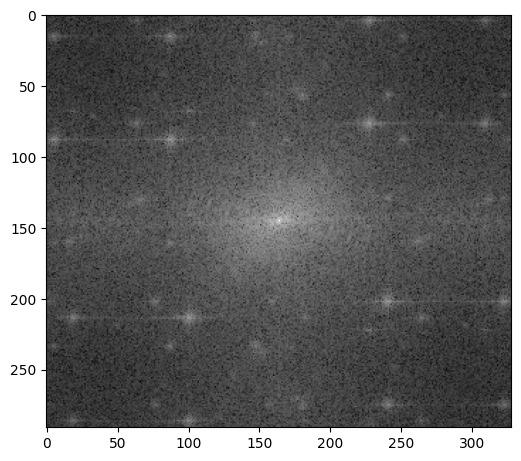

In [ ]:
# transformaton to signal domain through fft
imf2 = np.fft.fftshift(np.fft.fft2(im2))
plt.figure(figsize = (6,10))
plt.imshow(np.log(np.ones(imf2.shape)+abs(imf2)), cmap="gray")
plt.show()

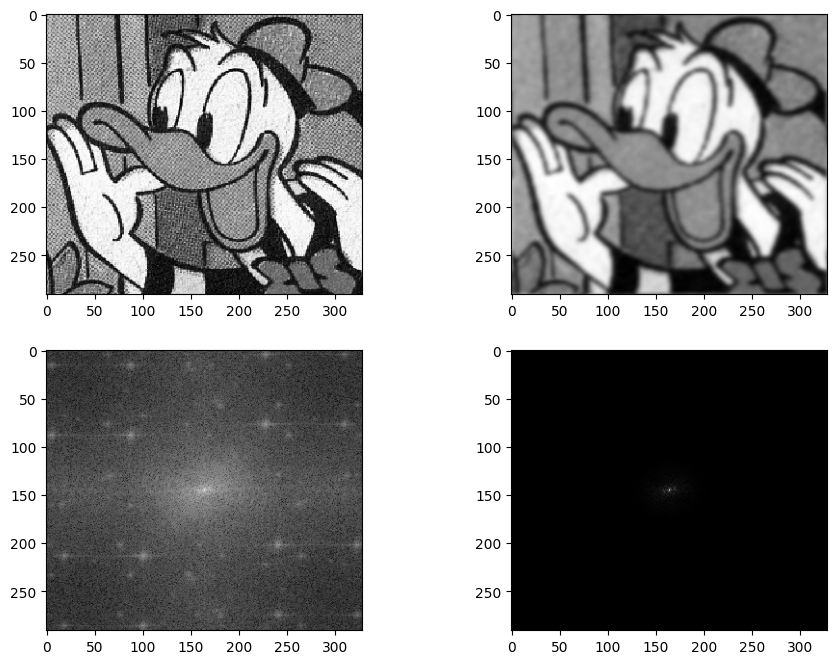

In [ ]:

# Define the Gaussian filter
def gaussian_filter(shape=(3, 3), sigma=0.5):
    m, n = [(ss-1.)/2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x*x + y*y) / (2.*sigma*sigma))
    h /= h.sum()
    return h

# Convert to grayscale
gray = im2

# Apply the FFT
f = np.fft.fft2(gray)

# Shift the FFT
fshift = np.fft.fftshift(f)

# Create a Gaussian filter
rows, cols = gray.shape
lpf = gaussian_filter(shape=(rows, cols), sigma=22)

# Apply the filter to the FFT
fshift_filtered = fshift * lpf

# Shift back the result
f_filtered = np.fft.ifftshift(fshift_filtered)

# Apply the inverse FFT
filtered = np.abs(np.fft.ifft2(f_filtered))

# Plot the original and filtered images
f, axarr = plt.subplots(2,2,figsize=(11,8))
axarr[0,0].imshow(im2, cmap = 'gray')
axarr[0,1].imshow(filtered, cmap = 'gray')
axarr[1,0].imshow(np.log(np.ones(fshift.shape)+abs(fshift)), cmap = 'gray')
axarr[1,1].imshow(np.log(np.ones(fshift_filtered.shape)+abs(fshift_filtered)), cmap = 'gray')
plt.show()

#Second Problem

##Introduction

In this section, we first load the images, do some practice and present two algorithems(the second one is faster) to detect the sharpness of images.
and then choosing the best image which successfully happens to be the same in both algorithem and has the best focus of course.

the results are also successful for Damavand set.

the sharpness result for Tokyo set is higher which tells that Tokyo has more details vs. Damavand

##Loading the images and putting them in an array

In [113]:
# first off we upload the images
tokyo1 = plt.imread("1_blurred_tokyo.jpg", ".jpg")
tokyo2 = plt.imread("2_blurred_tokyo.jpg", ".jpg")
tokyo3 = plt.imread("3_blurred_tokyo.jpg", ".jpg")
tokyo4 = plt.imread("4_blurred_tokyo.jpg", ".jpg")
tokyo5 = plt.imread("5_blurred_tokyo.jpg", ".jpg")
tokyo6 = plt.imread("6_blurred_tokyo.jpg", ".jpg")
tokyo7 = plt.imread("7_blurred_tokyo.jpg", ".jpg")
tokyo8 = plt.imread("8_blurred_tokyo.jpg", ".jpg")
tokyo9 = plt.imread("9_blurred_tokyo.jpg", ".jpg")
tokyo10 = plt.imread("10_blurred_tokyo.jpg", ".jpg")
tokyo11 = plt.imread("11_blurred_tokyo.jpg", ".jpg")
tokyo12 = plt.imread("12_blurred_tokyo.jpg", ".jpg")
tokyo13 = plt.imread("13_blurred_tokyo.jpg", ".jpg")
tokyo14 = plt.imread("14_blurred_tokyo.jpg", ".jpg")
tokyo15 = plt.imread("15_blurred_tokyo.jpg", ".jpg")
tokyo16 = plt.imread("16_blurred_tokyo.jpg", ".jpg")
tokyo17 = plt.imread("17_blurred_tokyo.jpg", ".jpg")
tokyo18 = plt.imread("18_blurred_tokyo.jpg", ".jpg")
tokyo19 = plt.imread("19_blurred_tokyo.jpg", ".jpg")
tokyo20 = plt.imread("20_blurred_tokyo.jpg", ".jpg")
tokyo21 = plt.imread("21_blurred_tokyo.jpg", ".jpg")
tokyo22 = plt.imread("22_blurred_tokyo.jpg", ".jpg")
tokyo23 = plt.imread("23_blurred_tokyo.jpg", ".jpg")
tokyo24 = plt.imread("24_blurred_tokyo.jpg", ".jpg")
tokyo25 = plt.imread("25_blurred_tokyo.jpg", ".jpg")
tokyo26 = plt.imread("26_blurred_tokyo.jpg", ".jpg")
tokyo27 = plt.imread("27_blurred_tokyo.jpg", ".jpg")
tokyo28 = plt.imread("28_blurred_tokyo.jpg", ".jpg")
tokyo29 = plt.imread("29_blurred_tokyo.jpg", ".jpg")
tokyo30 = plt.imread("30_blurred_tokyo.jpg", ".jpg")
tokyo31 = plt.imread("31_blurred_tokyo.jpg", ".jpg")
tokyo32 = plt.imread("32_blurred_tokyo.jpg", ".jpg")
tokyo33 = plt.imread("33_blurred_tokyo.jpg", ".jpg")
tokyo34 = plt.imread("34_blurred_tokyo.jpg", ".jpg")
tokyo35 = plt.imread("35_blurred_tokyo.jpg", ".jpg")
tokyo36 = plt.imread("36_blurred_tokyo.jpg", ".jpg")
tokyo37 = plt.imread("37_blurred_tokyo.jpg", ".jpg")
tokyo38 = plt.imread("38_blurred_tokyo.jpg", ".jpg")
tokyo39 = plt.imread("39_blurred_tokyo.jpg", ".jpg")
tokyo40 = plt.imread("40_blurred_tokyo.jpg", ".jpg")
tokyo41 = plt.imread("41_blurred_tokyo.jpg", ".jpg")


In [114]:
# first off we upload the images
damavand1 = plt.imread("1_blurred_damavand.jpg", ".jpg")
damavand2 = plt.imread("2_blurred_damavand.jpg", ".jpg")
damavand3 = plt.imread("3_blurred_damavand.jpg", ".jpg")
damavand4 = plt.imread("4_blurred_damavand.jpg", ".jpg")
damavand5 = plt.imread("5_blurred_damavand.jpg", ".jpg")
damavand6 = plt.imread("6_blurred_damavand.jpg", ".jpg")
damavand7 = plt.imread("7_blurred_damavand.jpg", ".jpg")
damavand8 = plt.imread("8_blurred_damavand.jpg", ".jpg")
damavand9 = plt.imread("9_blurred_damavand.jpg", ".jpg")
damavand10 = plt.imread("10_blurred_damavand.jpg", ".jpg")
damavand11 = plt.imread("11_blurred_damavand.jpg", ".jpg")
damavand12 = plt.imread("12_blurred_damavand.jpg", ".jpg")
damavand13 = plt.imread("13_blurred_damavand.jpg", ".jpg")
damavand14 = plt.imread("14_blurred_damavand.jpg", ".jpg")
damavand15 = plt.imread("15_blurred_damavand.jpg", ".jpg")
damavand16 = plt.imread("16_blurred_damavand.jpg", ".jpg")
damavand17 = plt.imread("17_blurred_damavand.jpg", ".jpg")
damavand18 = plt.imread("18_blurred_damavand.jpg", ".jpg")
damavand19 = plt.imread("19_blurred_damavand.jpg", ".jpg")
damavand20 = plt.imread("20_blurred_damavand.jpg", ".jpg")
damavand21 = plt.imread("21_blurred_damavand.jpg", ".jpg")
damavand22 = plt.imread("22_blurred_damavand.jpg", ".jpg")
damavand23 = plt.imread("23_blurred_damavand.jpg", ".jpg")
damavand24 = plt.imread("24_blurred_damavand.jpg", ".jpg")
damavand25 = plt.imread("25_blurred_damavand.jpg", ".jpg")
damavand26 = plt.imread("26_blurred_damavand.jpg", ".jpg")
damavand27 = plt.imread("27_blurred_damavand.jpg", ".jpg")
damavand28 = plt.imread("28_blurred_damavand.jpg", ".jpg")
damavand29 = plt.imread("29_blurred_damavand.jpg", ".jpg")
damavand30 = plt.imread("30_blurred_damavand.jpg", ".jpg")
damavand31 = plt.imread("31_blurred_damavand.jpg", ".jpg")
damavand32 = plt.imread("32_blurred_damavand.jpg", ".jpg")
damavand33 = plt.imread("33_blurred_damavand.jpg", ".jpg")
damavand34 = plt.imread("34_blurred_damavand.jpg", ".jpg")
damavand35 = plt.imread("35_blurred_damavand.jpg", ".jpg")
damavand36 = plt.imread("36_blurred_damavand.jpg", ".jpg")
damavand37 = plt.imread("37_blurred_damavand.jpg", ".jpg")
damavand38 = plt.imread("38_blurred_damavand.jpg", ".jpg")
damavand39 = plt.imread("39_blurred_damavand.jpg", ".jpg")
damavand40 = plt.imread("40_blurred_damavand.jpg", ".jpg")
damavand41 = plt.imread("41_blurred_damavand.jpg", ".jpg")


In [115]:
Tokyo = [tokyo1,
         tokyo2,
         tokyo3,
         tokyo4,
         tokyo5,
         tokyo6,
         tokyo7, 
         tokyo8, 
         tokyo9, 
         tokyo10,
         tokyo11,
         tokyo12,
         tokyo13,
         tokyo14,
         tokyo15,
         tokyo16,
         tokyo17,
         tokyo18,
         tokyo19,
         tokyo20,
         tokyo21,
         tokyo22,
         tokyo23,
         tokyo24,
         tokyo25,
         tokyo26,
         tokyo27,
         tokyo28,
         tokyo29,
         tokyo30,
         tokyo31,
         tokyo32,
         tokyo33,
         tokyo34,
         tokyo35,
         tokyo36,
         tokyo37,
         tokyo38,
         tokyo39,
         tokyo40,
         tokyo41]

In [116]:
Damavand = [damavand1,
            damavand2,
            damavand3,
            damavand4,
            damavand5,
            damavand6,
            damavand7, 
            damavand8, 
            damavand9, 
            damavand10,
            damavand11,
            damavand12,
            damavand13,
            damavand14,
            damavand15,
            damavand16,
            damavand17,
            damavand18,
            damavand19,
            damavand20,
            damavand21,
            damavand22,
            damavand23,
            damavand24,
            damavand25,
            damavand26,
            damavand27,
            damavand28,
            damavand29,
            damavand30,
            damavand31,
            damavand32,
            damavand33,
            damavand34,
            damavand35,
            damavand36,
            damavand37,
            damavand38,
            damavand39,
            damavand40,
            damavand41]

##Practice

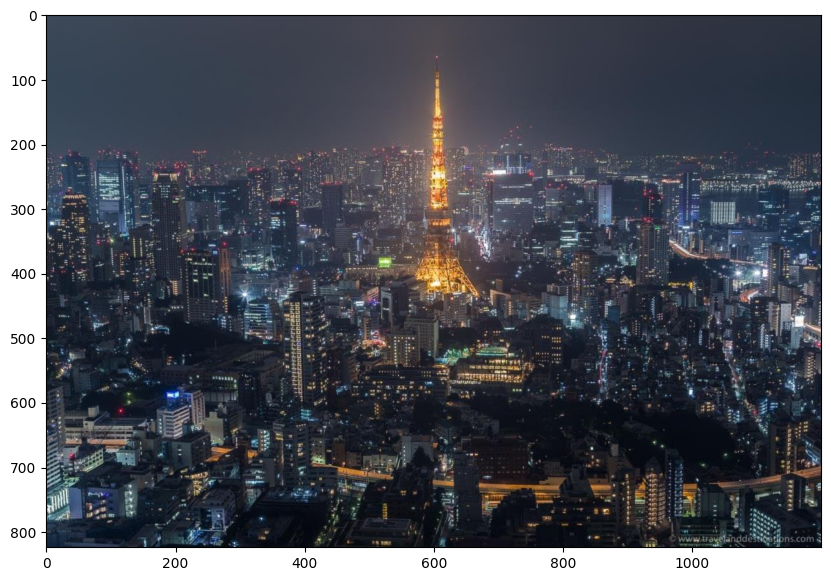

In [117]:
#showing one of them
plt.figure(figsize = (10,15))
plt.imshow(tokyo22)
plt.show()

In [118]:
tokyo22.shape

(824, 1200, 3)

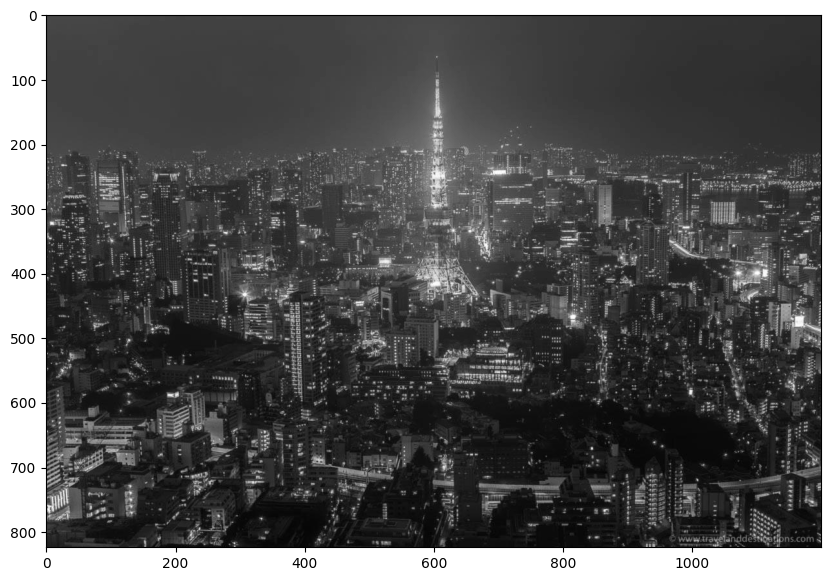

In [119]:
tokyo22gray = tokyo22@np.array([0.2989,0.5870,0.114])
plt.figure(figsize = (10,15))
plt.imshow(tokyo22gray, cmap = "gray")
plt.show()

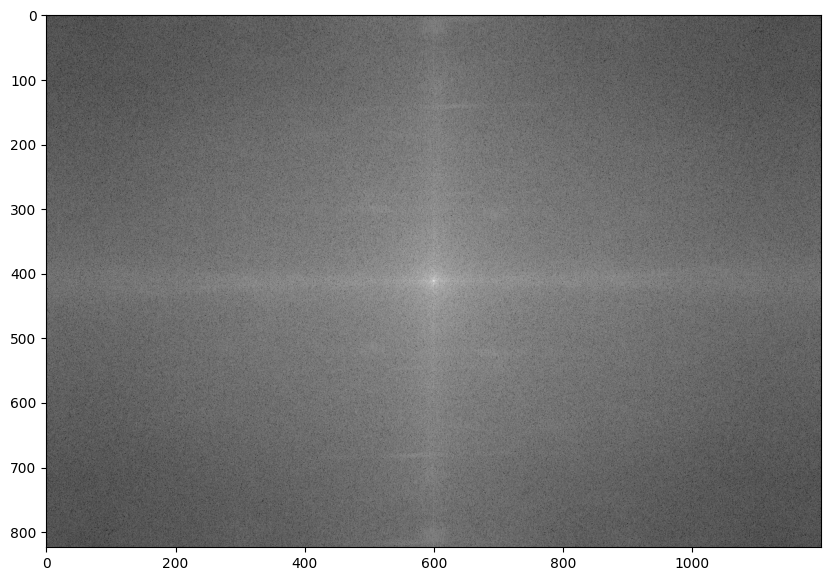

In [120]:
tokyo22grayf = np.fft.fftshift(np.fft.fft2(tokyo22gray))
plt.figure(figsize = (10,15))
plt.imshow(np.log(np.ones(tokyo22grayf.shape)+abs(tokyo22grayf)), cmap="gray")
plt.show()

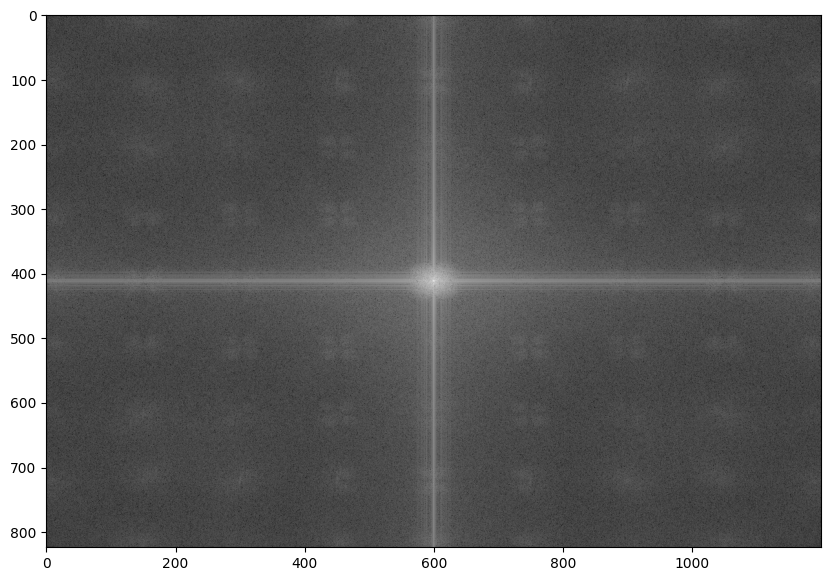

In [121]:
tokyo41gray = tokyo41@np.array([0.2989,0.5870,0.114])
tokyo41grayf = np.fft.fftshift(np.fft.fft2(tokyo41gray))
plt.figure(figsize = (10,15))
plt.imshow(np.log(np.ones(tokyo41grayf.shape)+abs(tokyo41grayf)), cmap="gray")
plt.show()

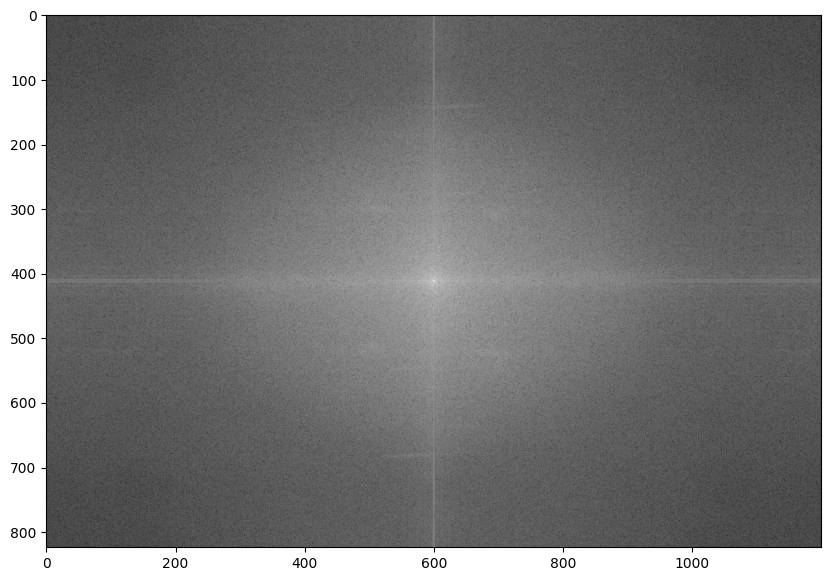

In [122]:
tokyo23gray = tokyo23@np.array([0.2989,0.5870,0.114])
tokyo23grayf = np.fft.fftshift(np.fft.fft2(tokyo23gray))
plt.figure(figsize = (10,15))
plt.imshow(np.log(np.ones(tokyo23grayf.shape)+abs(tokyo23grayf)), cmap="gray")
plt.show()

##Sharpness Detection

In [123]:

def detect_sharpness(image_path):

    img = image_path
    
    # Convert the image to grayscale
    img_gray = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    
    # Compute the Laplacian of the grayscale image
    laplacian = np.abs(np.fft.ifft2(np.fft.fft2(img_gray) * np.fft.fft2(np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]), s=img_gray.shape)))
    
    # Compute the average Laplacian value
    sharpness = np.average(laplacian)
    
    return sharpness


In [124]:
#sample
sharpness = detect_sharpness(tokyo27)
print(sharpness)

1.5956592016585847


In [132]:
S = []
for i in Tokyo:
  S.append(detect_sharpness(i))

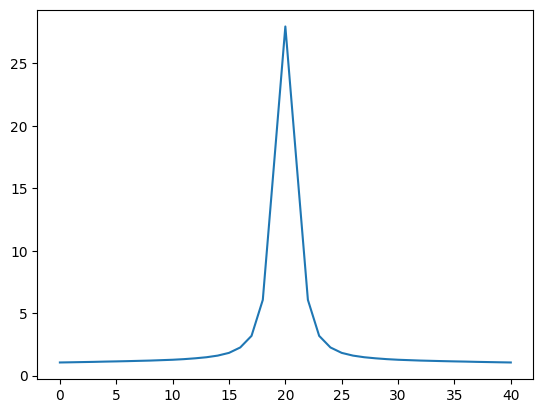

the Best picture is: 21 st


In [133]:
# plotting the sharpnesses
plt.plot(S)
plt.show()

print("the Best picture is:", np.array(S).argmax()+1, "st")

##Faster Algorithm

In [127]:
def sharpFast(img):
  # Converting the image to grayscale
  gray_img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

  # Calculating the Image Focus Metric
  focus_metric = np.var(np.gradient(gray_img))

  # Returning the focus metric
  return focus_metric
  
print(sharpFast(tokyo22))




118.99754221401312


In [134]:
SF = []
for i in Tokyo:
  SF.append(sharpFast(i))
  

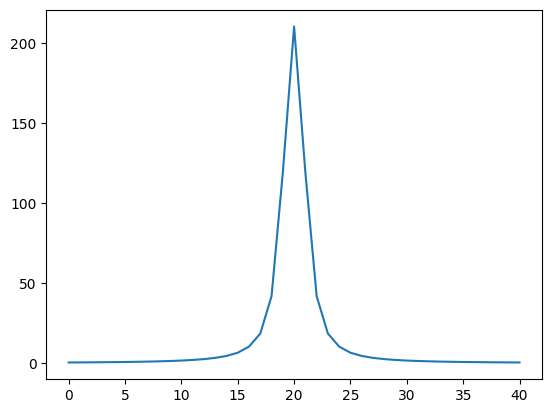

the Best picture is: 21 st


In [135]:
plt.plot(SF)
plt.show()

print("the Best picture is:", np.array(SF).argmax()+1, "st")

##Dmavand

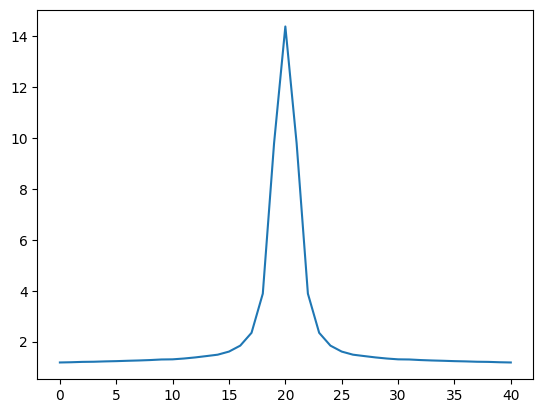

the Best picture is: 21 st


In [136]:
S = []
for i in Damavand:
  S.append(detect_sharpness(i))

plt.plot(S)
plt.show()

print("the Best picture is:", np.array(S).argmax()+1, "st")

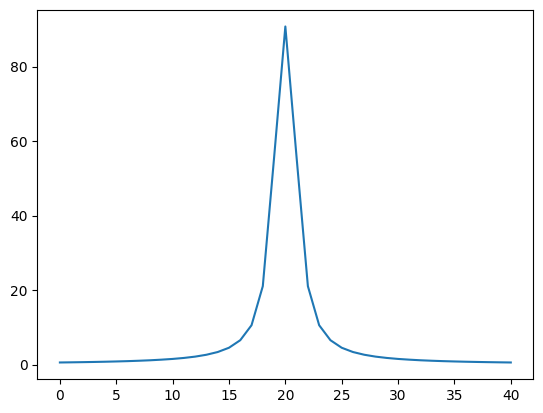

the Best picture is: 21 st


In [137]:
SF = []
for i in Damavand:
  SF.append(sharpFast(i))
  
plt.plot(SF)
plt.show()

print("the Best picture is:", np.array(SF).argmax()+1, "st")